# 線型回帰分析　( 重回帰分析 )

- 目的変数を説明する説明変数の方程式を求める


- 「$y = a_1x_1 + a_2x_2 + …　+ a_nx_n +b$」の形式


|記号|概要|
|:---:|:---|
|$y$|予想結果|
|$x_1$ … $x_n$|説明変数|
|$a_1$ … $a_n$|説明変数の係数|
|$b$|切片|

### 1. 単回帰分析と同様に前処理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 乱数の種を　１に
np.random.seed(1)

#  scikit-learn　model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Boston data set load
boston = load_boston()

### 2. pandas に data 移行
- 説明変数の paramerter そのまま移行
- MEDV として目的変数の列を追加

In [11]:
# 説明変数 ( boston.data ) -> df
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数 ( boston.target ) -> df
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. data の相関係数を表示

In [12]:
# data 相関係数の取得
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 4. data の標準化
- dataの `標準化` を行う
    - 複数の異なるスケールの説明変数を元に回帰分析を行う時には必須の方法
    - data scale を小さくして学習速度を上げる
    -  scale の異なる複数の説明変数の scale を埋める事で予想性能の向上
        - *計算誤差を小さくできる*

        

- <u>PC の場合 scale がバラバラの計算は誤差が出やすい</u>
- <u>誤差が大きいと予測が正しくなくなる</u>

    - *0.1,　100,　30.5,　-250,　0.065*
        - **なので標準化が必要になってくる**


### `StandardScaler` class の instance を生成
- *fit_transform method で paramerter を標準化できる*


$$
X' = \frac{X-\mu}{\sigma} 
$$


- $X$　:　標準化前の説明変数 
- $X'$　:　標準化後の説明変数 
- $\mu$　:　説明変数の平均値 
- $\sigma$　:　説明変数の標準偏差


In [13]:
# 特徴量の標準化
from sklearn.preprocessing import StandardScaler

# StandardScaler class instance 生成
stdsc = StandardScaler()

#　説明変数部分のみを標準化 ( 0 ~ 12 )
data_std = stdsc.fit_transform(boston_df.iloc[:, 0:13])
boston_df2 = pd.DataFrame(data_std, columns=boston.feature_names)
boston_df2['MEDV'] = boston_df['MEDV']

# 標準化した df2 の値を表示
boston_df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


- 標準化を行った事によってい全ての scale が似たような形になる

### 5. 標準化後の data
- describe で標準化後の data 概要を確認
- 標準偏差が　1　
- 平均が　0

In [14]:
# 標準化後の　data を表示
boston_df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


## 6. 回帰分析の実行
- data 学習用, 検証用に 7 : 3 に分割する

In [15]:
# 説明変数を X　, 目的変数を Y
X = boston_df2.iloc[:, 0:13].values
Y = boston_df2['MEDV'].values

# data を学習用と検証用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### 7. 重回帰分析
- 係数が説明変数の数だけ配列として取得できる

In [16]:
# 重回帰分析の実行
lr = LinearRegression()

# 線形モデルの重みを学習
lr.fit(X_train, Y_train)

print(f'codfficient = {lr.coef_}')    # 説明変数の係数を出力
print(f'intercept = {lr.intercept_}') # 切片を出力 

codfficient = [-0.84677953  1.41623312  0.40553633  0.61902108 -2.48543003  1.96244469
  0.10052138 -3.18967316  2.67519835 -1.89922198 -2.17462796  0.58828654
 -4.05806653]
intercept = 22.589670302295595


### 残差 plot

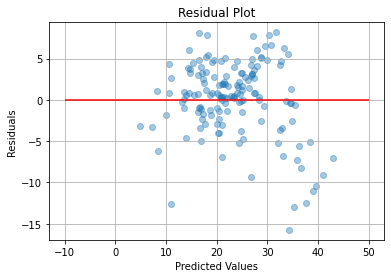

In [19]:
# 検証 data を用いて目的変数を予測
Y_pred = lr.predict(X_test)

# 残差を plot
plt.scatter(Y_pred, Y_pred - Y_test, alpha=0.4)

# x軸に沿った直線を plot
plt.hlines(y = 0, xmin = -10, xmax = 50, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

### MSE

In [20]:
# 平均二乗誤差による評価
from sklearn.metrics import mean_squared_error

# 学習 data に対する目的変数を予測
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

# 学習 data, test data を用いた時の平均二乗誤差
print(f'MSE train data: {mean_squared_error(Y_train, Y_train_pred)}')
print(f'MSE test data: {mean_squared_error(Y_test, Y_test_pred)}')

MSE train data: 23.513334449327022
MSE test data: 19.83132367206313


- *単回帰より値が近い*
    - **標準化をして説明変数を増やせばより精度の高い予測ができる**

### 決定係数 ( $R^2$ )
- $R^2$ スコア計算

In [21]:
# 決定係数　( R2スコア )による評価
from sklearn.metrics import r2_score
print(f'r^2 train data: {r2_score(Y_train, Y_train_pred)}')
print(f'r^2 test data: {r2_score(Y_test, Y_test_pred)}')

r^2 train data: 0.7103879080674731
r^2 test data: 0.7836295385076292


- **いい予測ができているのがわかる**

## 問題

In [2]:
np.random.seed(1)
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
boston_df['CHAS'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [18]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
data_std = stdsc.fit_transform(boston_df.iloc[:,0:13])
boston_df2 = pd.DataFrame(data_std, columns=boston.feature_names)
boston_df2['MEDV'] = boston_df['MEDV']
boston_df2 = boston_df2.drop(['CHAS', 'RAD'], axis=1)
boston_df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,36.2


In [19]:
boston_df2.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,7.396560e-03,4.877224e-02,1.015999e+00,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


In [29]:
X = boston_df2.iloc[:, 0:11].values
Y = boston_df2['MEDV'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [30]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print(f'傾き(coefficient): {lr.coef_}')
print(f'切片(intercept): {lr.intercept_}')

傾き(coefficient): [-0.75429167  1.17084185 -0.57751889 -1.78273266  2.44813599  0.15409451
 -3.41546864  0.2137405  -1.78027529  0.75716867 -4.0703431 ]
切片(intercept): 22.58232658277781


In [31]:
from sklearn.metrics import mean_squared_error
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)
print(f'MSE train data: {mean_squared_error(Y_train, Y_train_pred)}')
print(f'MSE test data: {mean_squared_error(Y_test, Y_test_pred)}')

MSE train data: 25.48731753764362
MSE test data: 19.267013675878363


In [32]:
from sklearn.metrics import r2_score
print(f'r^2 train data: {r2_score(Y_train, Y_train_pred)}')
print(f'r^2 test data: {r2_score(Y_test, Y_test_pred)}')

r^2 train data: 0.7025384318482111
r^2 test data: 0.7628377030918091
